<a href="https://colab.research.google.com/github/ayushiiii28/Meta-Scifor/blob/main/Avacado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Avacado Project
# Problem Statement:
# Avocado is a fruit consumed by people heavily in the United States.
# Content
# This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled
# into a single CSV.
# The table below represents weekly 2018 retail scan data for National retail volume (units) and
# price. Retail scan data comes directly from retailers’ cash registers based on actual retail
# sales of Hass avocados.
# Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-
# outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug,
# dollar and military. The Average Price (of avocados) in the table reflects a per unit (per
# avocado) cost, even when multiple units (avocados) are sold in bags.
# The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of
# avocados (e.g. greenskins) are not included in this table.
# Some relevant columns in the dataset:
# • Date - The date of the observation
# • AveragePrice - the average price of a single avocado
# • type - conventional or organic
# • year - the year
# • Region - the city or region of the observation
# • Total Volume - Total number of avocados sold
# • 4046 - Total number of avocados with PLU 4046 sold
# • 4225 - Total number of avocados with PLU 4225 sold
# • 4770 - Total number of avocados with PLU 4770 sold
# Inspiration /Label
# The dataset can be seen in two angles to find the region and find the average price .
# Task: One of Classification and other of Regression
# Do both tasks in the same .ipynb file and submit at single file.

In [1]:
# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
# Load dataset
data = pd.read_csv('/content/avocado.csv')
data = data.drop(columns=['Unnamed: 0'])

In [5]:
# Step 2: Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())
data['Date'] = pd.to_datetime(data['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB
None
       AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  

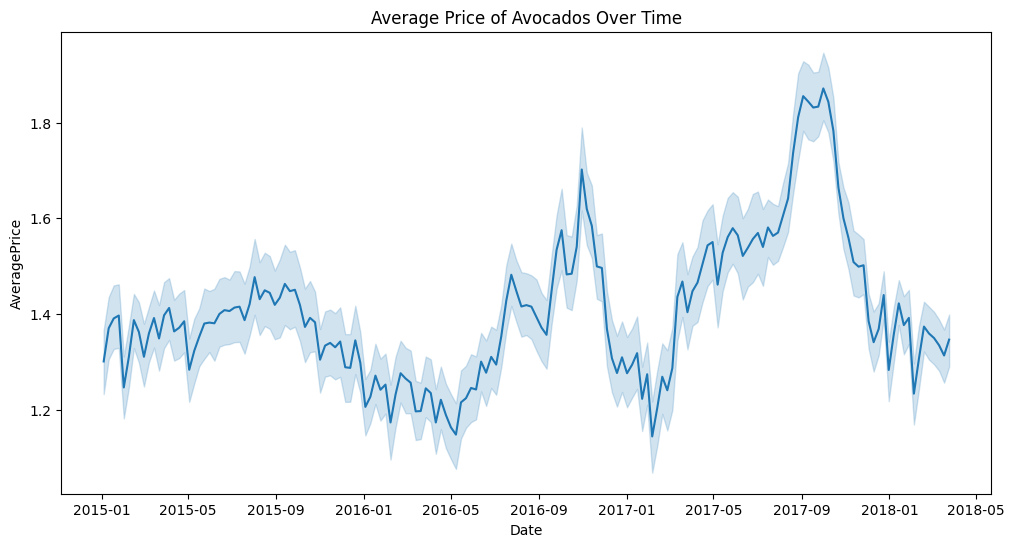

In [6]:
# Visualization - AveragePrice over time
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='AveragePrice')
plt.title('Average Price of Avocados Over Time')
plt.show()

In [8]:
# Step 3: Data Preprocessing
# Extract month and day from Date
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Encoding categorical features
le_type = LabelEncoder()
data['type'] = le_type.fit_transform(data['type'])

# Classification: encode region as target variable for classification
le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

In [9]:
# Step 4: Split Data
# Regression task (predicting AveragePrice)
X_reg = data.drop(columns=['AveragePrice', 'Date', 'region'])
y_reg = data['AveragePrice']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [10]:
# Classification task (predicting region)
X_class = data.drop(columns=['Date', 'region'])
y_class = data['region']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [11]:
# Step 5: Model Building and Training
# Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
print("Regression MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Regression R2 Score:", r2_score(y_test_reg, y_pred_reg))


Regression MAE: 0.2329713329167273
Regression R2 Score: 0.4330705934671034


In [12]:
# Classification Model
clf_model = RandomForestClassifier()
clf_model.fit(X_train_class, y_train_class)
y_pred_class = clf_model.predict(X_test_class)
print("Classification Accuracy:", accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class, target_names=le_region.classes_))

Classification Accuracy: 0.9093150684931507
                     precision    recall  f1-score   support

             Albany       0.86      0.95      0.90        63
            Atlanta       0.89      0.86      0.88        73
BaltimoreWashington       0.97      0.98      0.98        61
              Boise       0.97      0.86      0.91        72
             Boston       0.93      0.99      0.96        67
   BuffaloRochester       0.86      0.82      0.84        73
         California       1.00      1.00      1.00        62
          Charlotte       0.94      0.86      0.90        76
            Chicago       0.97      0.94      0.96        72
   CincinnatiDayton       0.91      0.89      0.90        65
           Columbus       0.86      0.86      0.86        65
      DallasFtWorth       0.94      0.97      0.96        68
             Denver       0.97      0.97      0.97        65
            Detroit       0.84      0.88      0.86        66
        GrandRapids       0.91      0.94